### Import necessary libraries

In [40]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import statistics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [2]:
# enable mpld3 for this notebook, see documentation
%matplotlib inline
import matplotlib.pylab as plt
import mpld3
mpld3.enable_notebook()

In [3]:
# import mpld3 modules
from mpld3 import plugins, utils

In [4]:
import re
s = 'c141y_d228a_n235k_n239m'

In [5]:
re.findall('[0-9]+',s) # example string matching

['141', '228', '235', '239']

### Load the cleaned dataset

In [6]:
# load in dataset
mutants = pd.read_csv('../data/interim/k8_clean_data.csv', header=None, low_memory=False)

In [7]:
mutants.head()

0      1      2      3      4      5      6      7      8      9     ...  \
0 -0.161 -0.014  0.002 -0.036 -0.033 -0.093  0.025  0.005  0.000 -0.015  ...   
1 -0.158 -0.002 -0.012 -0.025 -0.012 -0.106  0.013  0.005  0.000 -0.002  ...   
2 -0.169 -0.025 -0.010 -0.041 -0.045 -0.069  0.038  0.014  0.008 -0.014  ...   
3 -0.183 -0.051 -0.023 -0.077 -0.092 -0.015  0.071  0.027  0.020 -0.019  ...   
4 -0.154  0.005 -0.011 -0.013 -0.002 -0.115  0.005  0.002 -0.003  0.002  ...   

    5400   5401   5402   5403   5404   5405   5406   5407               5408  \
0  0.013  0.021  0.020  0.016 -0.011  0.003  0.010 -0.007        a119e_l125p   
1 -0.008  0.007  0.015 -0.008 -0.011 -0.004  0.013  0.005  a119e_r283k_a353v   
2  0.010  0.025  0.025  0.021 -0.012  0.006  0.016 -0.018              c135y   
3  0.012  0.050  0.038  0.051 -0.015  0.017  0.027 -0.049        c135y_e285m   
4  0.012  0.009  0.003 -0.001  0.002 -0.006  0.009  0.013        c135y_e285v   

       5409  
0  inactive  
1  inactive  
2  inactive  
3  inactive  
4  inactive  

[5 rows x 5410 columns]

In [8]:
# pull out the column of mutants with the nametags

nametags = mutants[5408].astype(str)
print(nametags)

0              a119e_l125p
1        a119e_r283k_a353v
2                    c135y
3              c135y_e285m
4              c135y_e285v
               ...        
16586    y220c_t230c_n239y
16587    y220c_y234f_n239l
16588                y234c
16589          y234c_a119e
16590          y234f_n239l
Name: 5408, Length: 16591, dtype: object


### Subset the data

subset the data! first implement analysis on subset, then apply same on full dataset

first, check the mutant tags to see where the mutations are in the amino acid chain, and then subset based on domains

will have 5 subsets, corresponding to each of the 5 major p53 domains!

In [9]:
# create empty lists for each domain
# each list will store the indexes of the mutants (rows) for their respective protein domains

ad_loci = []
dbd_loci = []
td_loci = []
nls_loci = []
bd_loci = []

In [10]:
def binner(num):
    if num <= 101:
        b = 0
    elif num < 305:
        b = 1
    elif num < 326:
        b = 2
    elif num < 364:
        b = 3
    else:
        b = 4
    return b

In [11]:
# since there could be multiple loci, sort based on avg (center) of mutation loci

for tag in nametags:
        search = re.findall('[0-9]+', str(tag))
        snps = np.array(list(map(int, search)))
        bins = list(map(binner,snps))
        b = statistics.mode(bins)
        
#         avg = np.mean(snps)

        
        if b == 0:
            #t = nametags.index(nametags.loc[tag])
            ad_loci.append(mutants[mutants[5408] == tag])
        elif b == 1:
            #t = nametags.index(tag)
            dbd_loci.append(mutants[mutants[5408] == tag])
        elif b == 2:
            #t = nametags.index(tag)
            td_loci.append(mutants[mutants[5408] == tag])
        elif b == 3:
            #t = nametags.index(tag)
            nls_loci.append(mutants[mutants[5408] == tag])
        elif b == 4:
            #t = nametags.index(tag)
            bd_loci.append(mutants[mutants[5408] == tag])
        
            

# make sure to check the size of each subset

In [18]:
len(ad_loci)

0

In [19]:
len(dbd_loci)

16591

In [20]:
len(td_loci)

0

In [21]:
len(nls_loci)

0

In [22]:
len(bd_loci)

0

In [16]:
#ad_loci = pd.concat(nls_loci)

In [23]:
# maybe add in the different methods used to partition the data in this way for comparison of the results

I tried splitting the dataset up by the domain that contained the mutation loci, but that did not work. 

Splitting the mutants by protein domain provided wildly imbalanced subsets, since it seems that the overwhelming majority of the mutants have at least one mutation in the DBD domain of p53. 
We can look at the domain-wise distribution of the p53 mutations to confirm this. 

A more even way to partition the dataset would probably be to partition by the number of mutations per mutant - one, two, three, or four and more mutations.

In [24]:
singles = [] # one mutation
doubles = [] # two mutations
triples = [] # three mutations
multis = [] # four or more mutations

In [25]:
# subset data based on the number of mutations per mutant protein

for tag in nametags:
        search = re.findall('[0-9]+', str(tag))
        snps = np.array(list(map(int, search)))
        num_loci = len(snps)
        
        if num_loci == 1:
            #t = nametags.index(nametags.loc[tag])
            singles.append(mutants[mutants[5408] == tag])
        elif num_loci == 2:
            #t = nametags.index(tag)
            doubles.append(mutants[mutants[5408] == tag])
        elif num_loci == 3:
            #t = nametags.index(tag)
            triples.append(mutants[mutants[5408] == tag])
        elif num_loci >= 4:
            #t = nametags.index(tag)
            multis.append(mutants[mutants[5408] == tag])
        
# make sure to check the size of each subset

In [26]:
singles = pd.concat(singles)
doubles = pd.concat(doubles)
triples = pd.concat(triples)
multis = pd.concat(multis)

In [27]:
singles.shape

(61, 5410)

In [28]:
doubles.shape

(16374, 5410)

In [29]:
triples.shape

(114, 5410)

In [30]:
multis.shape

(42, 5410)

Splitting the dataset this way also gave us imbalanced subsets, but not *quite* as imbalanced as they were when separated by protein domain. We can see that the majority of mutants in the dataset have only two mutations, and single mutations or three or more mutations are less common.

Is there perhaps a relationship between the number of mutations and the mutation loci? 

*One idea is to randomly subset the rows of the dataset for the preprocessing. Otherwise, if possible, we could make synthetic data to supplement the subsets.*

## Data Visualization with PCA

Let's try visualizing with PCA to find some trends in the data. We'll then plot the data with t-SNE and compare the results.

Reference: 
https://medium.com/analytics-vidhya/pca-vs-t-sne-17bcd882bf3d#:~:text=t%2DSNE%20is%20also%20a,large%20pairwise%20distance%20maximize%20variance.&text=It%20takes%20a%20set%20of,it%20into%20low%20dimensional%20data

In [31]:
mutants.shape # cleaned starting dataset

(16591, 5410)

In [32]:
labels = mutants[5409] # target variable labels
tags = mutants[5408] # mutant tag names

In [35]:
# dropping labels and tags from mutants data and storing in a new variable, m
m = mutants.drop([5408, 5409], axis=1)

In [36]:
m.shape

(16591, 5408)

In [38]:
labels.shape

(16591,)

In [39]:
tags.shape

(16591,)

In [37]:
m.head() # only numerical data

0      1      2      3      4      5      6      7      8      9     ...  \
0 -0.161 -0.014  0.002 -0.036 -0.033 -0.093  0.025  0.005  0.000 -0.015  ...   
1 -0.158 -0.002 -0.012 -0.025 -0.012 -0.106  0.013  0.005  0.000 -0.002  ...   
2 -0.169 -0.025 -0.010 -0.041 -0.045 -0.069  0.038  0.014  0.008 -0.014  ...   
3 -0.183 -0.051 -0.023 -0.077 -0.092 -0.015  0.071  0.027  0.020 -0.019  ...   
4 -0.154  0.005 -0.011 -0.013 -0.002 -0.115  0.005  0.002 -0.003  0.002  ...   

    5398   5399   5400   5401   5402   5403   5404   5405   5406   5407  
0 -0.015  0.006  0.013  0.021  0.020  0.016 -0.011  0.003  0.010 -0.007  
1 -0.007  0.002 -0.008  0.007  0.015 -0.008 -0.011 -0.004  0.013  0.005  
2 -0.016  0.019  0.010  0.025  0.025  0.021 -0.012  0.006  0.016 -0.018  
3 -0.028  0.051  0.012  0.050  0.038  0.051 -0.015  0.017  0.027 -0.049  
4  0.027 -0.011  0.012  0.009  0.003 -0.001  0.002 -0.006  0.009  0.013  

[5 rows x 5408 columns]

In [41]:
# Standardizing data
standardized_m = StandardScaler().fit_transform(m)
standardized_m.shape

(16591, 5408)

In [42]:
# co-variance of matrix
sample_data = standardized_m
cov_matrix = np.matmul(sample_data.T, sample_data)
cov_matrix.shape

(5408, 5408)

In [43]:
from scipy.linalg import eigh

In [44]:
# calculating top two eigenvectors for projecting onto a 2D space
values, vectors = eigh(cov_matrix, eigvals=(5406, 5407))
print(vectors.shape)
vectors = vectors.T
print(vectors.shape)

(5408, 2)
(2, 5408)


In [45]:
# projecting original data sample on plane formed by two principal eigenvectors by vector-vector multiplication
new_coord = np.matmul(vectors, sample_data.T)
new_coord.shape

(2, 16591)

In [46]:
# appending labels and tags to the 2D projection of the data
new_coord = np.vstack((new_coord, labels, tags)).T

In [47]:
# new dataframe for plotting labeled 2D projection
df = pd.DataFrame(data=new_coord, columns=("1st_Principal", "2nd_Principal", "Labels", "Tags"))
df.head()

1st_Principal 2nd_Principal    Labels               Tags
0      -14.7834       -13.133  inactive        a119e_l125p
1      -21.1552       4.27032  inactive  a119e_r283k_a353v
2       15.2744      -8.29186  inactive              c135y
3        11.052      -31.7136  inactive        c135y_e285m
4        28.884       16.3317  inactive        c135y_e285v

In [48]:
df.shape

(16591, 4)

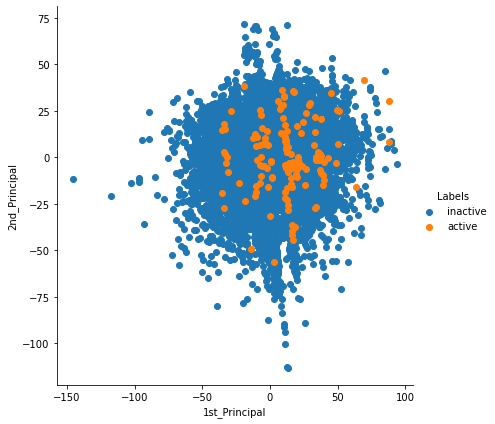

In [49]:
# plotting 2D datapoints with seaborn
# idk if this would work better if the Labels were one-hot encoded

sns.FacetGrid(df, hue="Labels", height=6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
plt.show()

In [53]:
labels.value_counts() # blue points are inactive, orange points are active

inactive    16449
active        142
Name: 5409, dtype: int64

At this point, I think it'd be good to change the hues for the PCA plot and look for more patterns. This calls for some feature extraction. Before that, let's continue and finish up the PCA plot.


In [54]:
# initialize PCA
from sklearn import decomposition
pca = decomposition.PCA()

In [56]:
# configuring the number of components
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("shape of the reduced PCA = ", pca_data.shape)

shape of the reduced PCA =  (16591, 2)


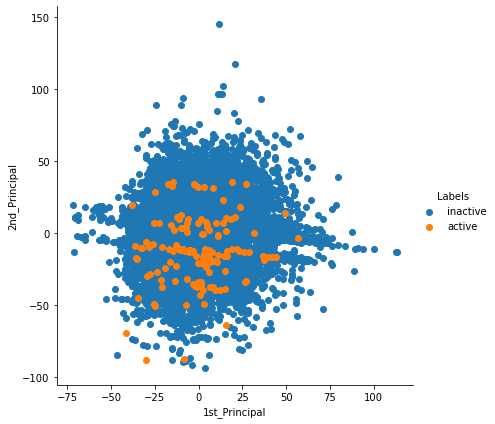

In [57]:
# appending labels to PCA data
pca_data = np.vstack((pca_data.T, labels)).T

# new dataframe to plot the PCA results
pca_df = pd.DataFrame(pca_data, columns=("1st_Principal", "2nd_Principal", "Labels"))
sns.FacetGrid(pca_df, hue="Labels", height=6).map(plt.scatter, '1st_Principal', '2nd_Principal').add_legend()
plt.show()

## Visualizing Results of t-SNE

## Dimensionality Reduction

### Using Mutual Information to Reduce the Number of Features